In [4]:
import pandas as pd 

In [5]:
rating = pd.read_csv(r"C:\Users\bhask\Downloads\archive\rating.csv")
tag = pd.read_csv(r"C:\Users\bhask\Downloads\archive\tag.csv")
movie = pd.read_csv(r"C:\Users\bhask\Downloads\archive\movie.csv")

In [3]:
print(f"ratings shape = {rating.shape}")
print(f"tags shape = {tag.shape}")
print(f"movies shape = {movie.shape}")

ratings shape = (20000263, 4)
tags shape = (465564, 4)
movies shape = (27278, 3)


In [4]:
rating.head(2)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16


In [5]:
movie.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [6]:
tag.head(2)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18


In [7]:
rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [8]:
del rating['timestamp']
del tag['timestamp']

In [9]:
rating.columns

Index(['userId', 'movieId', 'rating'], dtype='object')

In [10]:
tag.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [11]:
movie.columns

Index(['movieId', 'title', 'genres'], dtype='object')

# Data Structures

In [12]:
tag.iloc[0]

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object

In [13]:
row_0 = tag.iloc[0]

In [14]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [15]:
row_0["userId"]

np.int64(18)

In [16]:
row_0.name

0

In [20]:
row_0 = row_0.rename("firstname")
row_0

userId              18
movieId           4141
tag        Mark Waters
Name: firstname, dtype: object

# Data Frame

In [21]:
tag.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [23]:
tag.index

RangeIndex(start=0, stop=465564, step=1)

# Discriptive Statistic

In [24]:
rating.columns

Index(['userId', 'movieId', 'rating'], dtype='object')

In [26]:
rating['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [27]:
rating.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [28]:
rating.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [29]:
rating.mode()

,userId,movieId,rating
0,118205,296,4.0


In [30]:
rating.std()

userId     40038.626653
movieId    19789.477445
rating         1.051989
dtype: float64

In [31]:
rating.min()

userId     1.0
movieId    1.0
rating     0.5
dtype: float64

In [32]:
rating.max()

userId     138493.0
movieId    131262.0
rating          5.0
dtype: float64

In [33]:
rating.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [34]:
filter1 = rating[rating['rating'] > 4.5]
filter1

,userId,movieId,rating
131,1,4993,5.0
142,1,5952,5.0
158,1,7153,5.0
170,1,8507,5.0
176,2,62,5.0
...,...,...,...
20000230,138493,48780,5.0
20000244,138493,55269,5.0
20000245,138493,55814,5.0
20000251,138493,59784,5.0


# Data Cleaning: Handling Missing Data

In [35]:
movie.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [36]:
rating.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [37]:
tag.isnull().sum()

userId      0
movieId     0
tag        16
dtype: int64

In [40]:
tag.loc[tag["tag"].isnull()]

,userId,movieId,tag
373276,116460,123,NaN
373277,116460,346,NaN
373281,116460,1184,NaN
373288,116460,1785,NaN
373289,116460,2194,NaN
373291,116460,2691,NaN
373299,116460,4103,NaN
373301,116460,4473,NaN
373303,116460,4616,NaN
373319,116460,7624,NaN


In [41]:
tag = tag.dropna()
tag

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero
...,...,...,...
465559,138446,55999,dragged
465560,138446,55999,Jason Bateman
465561,138446,55999,quirky
465562,138446,55999,sad


In [42]:
tag.isnull().sum()

userId     0
movieId    0
tag        0
dtype: int64

# Visualization

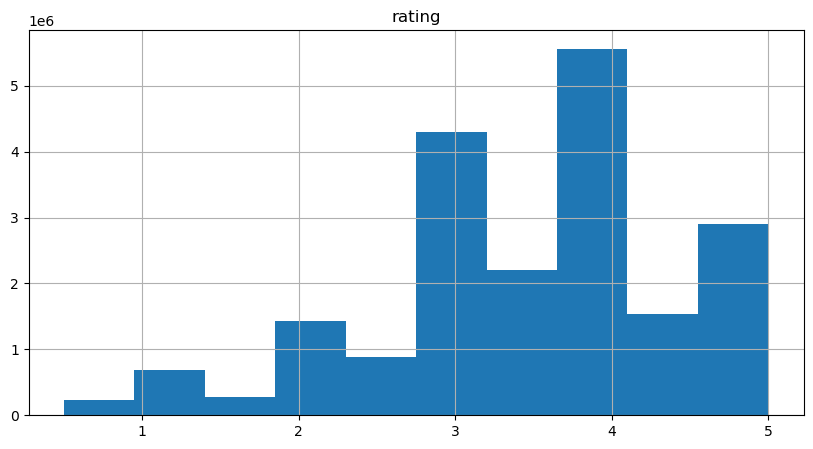

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

rating.hist(column='rating', figsize=(10, 5))
plt.show()

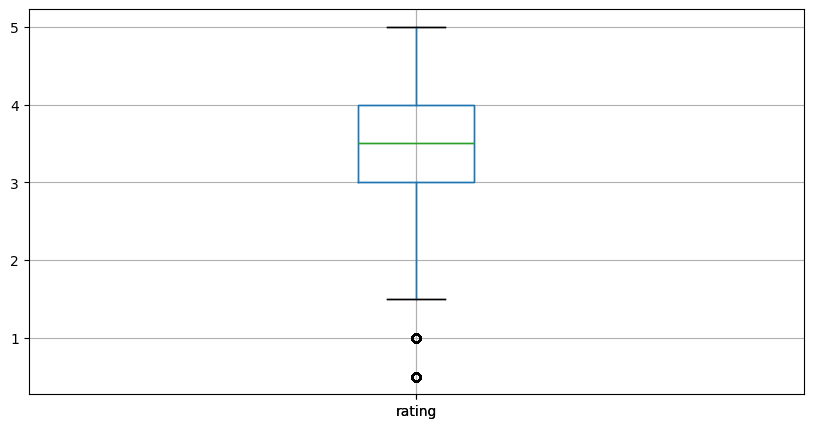

In [11]:
rating.boxplot(column='rating', figsize=(10, 5))
plt.show()

In [12]:
rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [13]:
movie.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [14]:
tag.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [15]:
m_c = movie['genres'].value_counts
m_c

<bound method IndexOpsMixin.value_counts of 0        Adventure|Animation|Children|Comedy|Fantasy
1                         Adventure|Children|Fantasy
2                                     Comedy|Romance
3                               Comedy|Drama|Romance
4                                             Comedy
                            ...                     
27273                                         Comedy
27274                                         Comedy
27275                                      Adventure
27276                             (no genres listed)
27277                       Adventure|Fantasy|Horror
Name: genres, Length: 27278, dtype: object>

In [16]:
tag_count = tag['tag'].value_counts()
tag_count

tag
sci-fi                 3384
based on a book        3281
atmospheric            2917
comedy                 2779
action                 2657
                       ... 
Diamond Dallas Page       1
I'm Devon Butler!         1
No arguement              1
Really Bad                1
Botox                     1
Name: count, Length: 38643, dtype: int64

In [17]:
tag['tag'][-10:]

465554                  visually appealing
465555                     family friendly
465556    Scary Movies To See on Halloween
465557                           Peter Pan
465558                  visually appealing
465559                             dragged
465560                       Jason Bateman
465561                              quirky
465562                                 sad
465563                       rise to power
Name: tag, dtype: object

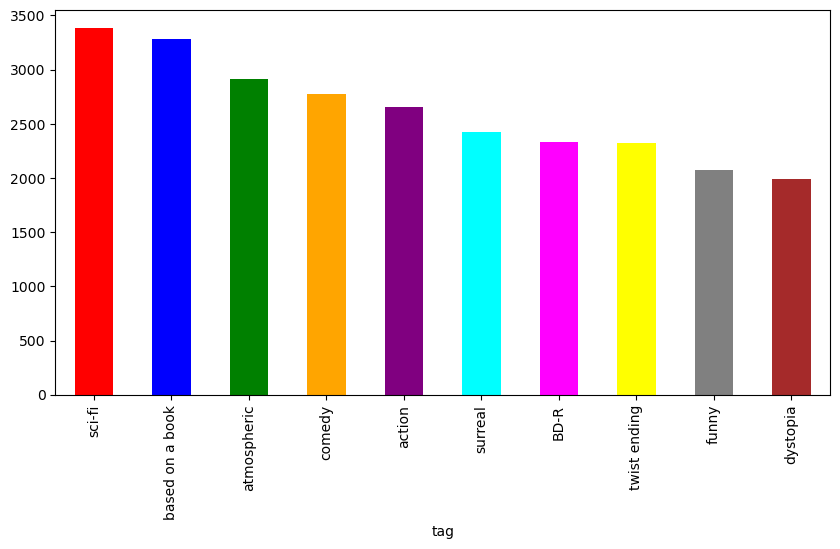

In [22]:
c = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'Magenta', 'Yellow', 'Gray', 'Brown']
tag_count[:10].plot(kind='bar', color=c, figsize=(10, 5))
plt.show()

# Filters for Selecting Rows

In [23]:
high_rated = rating[rating['rating'] >= 5]
high_rated

,userId,movieId,rating,timestamp
131,1,4993,5.0,2005-04-02 23:31:22
142,1,5952,5.0,2005-04-02 23:30:19
158,1,7153,5.0,2005-04-02 23:30:33
170,1,8507,5.0,2004-09-10 03:13:47
176,2,62,5.0,2000-11-21 15:29:58
...,...,...,...,...
20000230,138493,48780,5.0,2009-10-17 18:39:59
20000244,138493,55269,5.0,2009-10-17 21:48:08
20000245,138493,55814,5.0,2009-10-17 20:26:21
20000251,138493,59784,5.0,2009-10-17 22:01:41


In [27]:
action= movie[movie['genres'].str.contains('Action')]
action[10:]

,movieId,title,genres
69,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
70,71,Fair Game (1995),Action
75,76,Screamers (1995),Action|Sci-Fi|Thriller
77,78,"Crossing Guard, The (1995)",Action|Crime|Drama|Thriller
85,86,White Squall (1996),Action|Adventure|Drama
...,...,...,...
27168,130842,Power/Rangers (2015),Action|Adventure|Sci-Fi
27187,130984,Santo vs. las lobas (1976),Action|Fantasy|Horror
27198,131025,The Brass Legend (1956),Action
27236,131122,Love Exposure (2007),Action|Comedy|Drama|Romance


# Group By and Aggregate

In [28]:
rating_count = rating[['movieId', 'rating']].groupby('rating').count()
rating_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [29]:
avg_rating = rating[['movieId', 'rating']].groupby('movieId').mean()
avg_rating

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592
...,...
131254,4.000000
131256,4.000000
131258,2.500000


In [30]:
movie_count = rating[['movieId', 'rating']].groupby('movieId').count()
movie_count

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161
...,...
131254,1
131256,1
131258,1


# Merge Dataframes

In [31]:
tag.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [32]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [33]:
t = movie.merge(tag,on='movieId',how='inner')
t

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched,2014-12-04 23:44:40
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation,2007-07-08 13:59:15
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature,2007-07-08 22:21:47
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation,2007-07-08 22:46:10
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie,2009-06-15 19:19:33
...,...,...,...,...,...,...
465559,131258,The Pirates (2014),Adventure,28906,bandits,2015-03-30 19:57:01
465560,131258,The Pirates (2014),Adventure,28906,Korea,2015-03-30 19:58:32
465561,131258,The Pirates (2014),Adventure,28906,mutiny,2015-03-30 19:59:02
465562,131258,The Pirates (2014),Adventure,28906,pirates,2015-03-30 19:56:59
